In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Create sqlalchemy engine to connect to database

conf ={
    'host':"world-happiness.cninzdguguss.us-east-1.rds.amazonaws.com",
    'port':'5432',
    'database':"postgres",
    'user':"postgres",
    'password':"happiness"
}
engine = create_engine("postgresql://{user}:{password}@{host}:{port}/{database}".format(**conf))
conn = engine.connect()

In [3]:
#Create query, query the database and display data.

query="""
select 
    c.country,
    c.region,
    c.sub_region, 
    h.year, 
    h.life_ladder_log,
    h.gdp_per_capita,
    h.social_support,
    h.healthy_life_expectancy_at_birth,
    h.freedom_to_make_life_choices,
    h.generosity,
    h.perceptions_of_corruption,
    h.positive_affect,
    h.negative_affect,
    h.confidence_in_national_government
from happiness h
join countries c on  c.country_id=h.country_id
"""

happiness_df = pd.read_sql(query, conn)
happiness_df.head()

,country,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
0,Afghanistan,Asia,Southern Asia,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,Asia,Southern Asia,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,Asia,Southern Asia,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,Asia,Southern Asia,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,Asia,Southern Asia,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [4]:
#check counts
happiness_df.count()

country                              2089
region                               2089
sub_region                           2089
year                                 2089
life_ladder_log                      2089
gdp_per_capita                       2062
social_support                       2076
healthy_life_expectancy_at_birth     2031
freedom_to_make_life_choices         2057
generosity                           2009
perceptions_of_corruption            1976
positive_affect                      2065
negative_affect                      2073
confidence_in_national_government    1873
dtype: int64

In [5]:
#remove rows with null values
happiness_df = happiness_df.dropna()
happiness_df.head()

,country,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
0,Afghanistan,Asia,Southern Asia,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,Asia,Southern Asia,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,Asia,Southern Asia,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,Asia,Southern Asia,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,Asia,Southern Asia,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [6]:
#count again to confirm removal
happiness_df.count()

country                              1747
region                               1747
sub_region                           1747
year                                 1747
life_ladder_log                      1747
gdp_per_capita                       1747
social_support                       1747
healthy_life_expectancy_at_birth     1747
freedom_to_make_life_choices         1747
generosity                           1747
perceptions_of_corruption            1747
positive_affect                      1747
negative_affect                      1747
confidence_in_national_government    1747
dtype: int64

In [7]:
# adjust scores to the tenth decimal place.
# happiness_df['life_ladder_log']=happiness_df['life_ladder_log'] * .1
# happiness_df['gdp_per_capita']=happiness_df['gdp_per_capita'] * .1
# happiness_df['healthy_life_expectancy_at_birth']=happiness_df['healthy_life_expectancy_at_birth'] * .01

In [8]:
#display adjusted values
happiness_df.head()

,country,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
0,Afghanistan,Asia,Southern Asia,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,Asia,Southern Asia,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,Asia,Southern Asia,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,Asia,Southern Asia,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,Asia,Southern Asia,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [9]:
# create list of columns to use to generate score.
col_list= [
#  'life_ladder_log',
 'gdp_per_capita',
 'social_support',
 'healthy_life_expectancy_at_birth',
 'freedom_to_make_life_choices',
 'generosity',
 'perceptions_of_corruption',
 'confidence_in_national_government',
 'positive_affect',
 'negative_affect' 
]

In [10]:
#sum the scores and create a happiness_score column
happiness_df['happiness_score']=happiness_df.life_ladder_log
#create the output column
mean=happiness_df['happiness_score'].mean()
happiness_df['happy'] = np.where(happiness_df['happiness_score']> mean, 1, 0) 
#display results
happiness_df.head()

,country,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,happiness_score,happy
0,Afghanistan,Asia,Southern Asia,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072,3.723590,0
1,Afghanistan,Asia,Southern Asia,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,4.401778,0
2,Afghanistan,Asia,Southern Asia,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,4.758381,0
3,Afghanistan,Asia,Southern Asia,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,3.831719,0
4,Afghanistan,Asia,Southern Asia,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,3.782938,0


In [11]:
#save cvs file to use in dashboard displays
# happiness_df.to_csv('happiness_score.csv', index=False)

In [12]:
#drop healthy_life_expectancy_at_birth outliers
happiness_df = happiness_df[happiness_df['healthy_life_expectancy_at_birth'] > 30] 

In [13]:
#save cvs file to use in dashboard displays
happiness_df.to_csv('happiness_score.csv', index=False)

In [14]:
#create x and y
X= happiness_df[col_list]
y=happiness_df['happy']

In [15]:
y.value_counts()

0    898
1    846
Name: happy, dtype: int64

In [16]:
X.describe()

,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,confidence_in_national_government,positive_affect,negative_affect
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,9.347738,0.811795,63.082558,0.746624,0.002048,0.752215,0.484826,0.657918,0.269840
std,1.157131,0.121691,7.013600,0.137294,0.161583,0.183833,0.192749,0.106376,0.081964
min,5.526723,0.290184,33.320000,0.260069,-0.335739,0.035198,0.078787,0.263487,0.094316
25%,8.402164,0.743525,58.215001,0.655841,-0.108777,0.698918,0.334012,0.575056,0.208540
50%,9.487601,0.838713,64.932503,0.766870,-0.020787,0.807618,0.468631,0.669647,0.259751
75%,10.309073,0.908716,68.720001,0.854503,0.092565,0.874887,0.618509,0.743683,0.319389
max,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.993604,0.883586,0.599335


In [17]:
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.73400996,  0.57066025, -0.15867094, ..., -0.5016521 ,
        -0.62781454, -1.10259817],
       [ 0.47158749, -0.16172132,  0.33912114, ...,  1.72712388,
         0.77353592, -1.30391817],
       [-0.41552731,  0.01592294, -0.15582635, ...,  1.04570554,
         1.22150762,  0.79223331],
       ...,
       [-0.34116652,  0.00674596, -0.49148053, ..., -0.40491542,
        -0.99825588, -0.18047501],
       [ 0.08803903,  0.761907  ,  0.63779617, ..., -0.20475234,
         1.19807188,  0.20111365],
       [ 1.07064551,  0.97442917,  0.98198358, ...,  0.67083746,
         1.2048846 , -0.77119106]])

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [20]:
from sklearn.linear_model import LinearRegression
def linier_regression_model(xval):
    model = LinearRegression()
    X =  happiness_df[xval].values.reshape(-1, 1)
    y = happiness_df.happiness_score
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f"slope: {round(model.coef_[0],2)}")
    print(f"y-intercept: {round(model.intercept_,2)}")
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel(xval)
    plt.ylabel('happiness_score')
    plt.show()


In [21]:
# function for metrics report

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Unhappy(0)', 'Happy(1)'], yticklabels=['Unhappy(0)', 'Happy(1)'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    print('')
    print('Feature Importance')
    print('-------------------------------------')
    # List the features sorted in descending order by feature importance
    features = sorted(zip(clf.feature_importances_, X.columns), reverse=True)
    for feature in features: 
        print(f"{feature[1]}")
    
    print('')
    print("Linear Regression Models")
    print('-------------------------------------')
    for feature in features: 
        print(f"Feature: {feature[1]}")
        print(f"Importance:({round(feature[0],2)})")
        linier_regression_model(feature[1])

In [22]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm)

cm_df

,0,1
0,198,14
1,28,196


              precision    recall  f1-score   support

           0       0.88      0.93      0.90       212
           1       0.93      0.88      0.90       224

    accuracy                           0.90       436
   macro avg       0.90      0.90      0.90       436
weighted avg       0.91      0.90      0.90       436



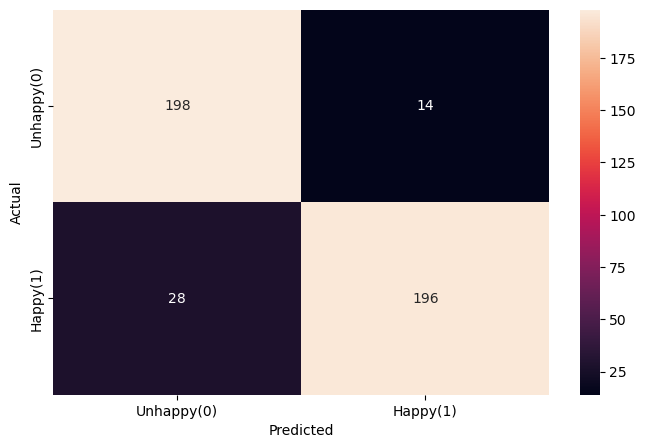

Training Score: 1.0
Testing Score: 0.9036697247706422

Feature Importance
-------------------------------------
gdp_per_capita
healthy_life_expectancy_at_birth
social_support
positive_affect
freedom_to_make_life_choices
confidence_in_national_government
perceptions_of_corruption
negative_affect
generosity

Linear Regression Models
-------------------------------------
Feature: gdp_per_capita
Importance:(0.25)
slope: 0.78
y-intercept: -1.77


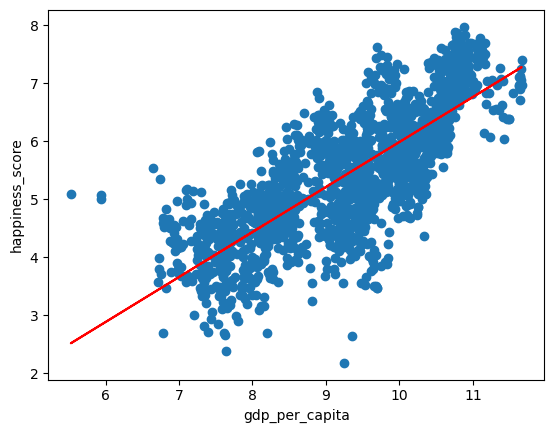

Feature: healthy_life_expectancy_at_birth
Importance:(0.21)
slope: 0.12
y-intercept: -2.17


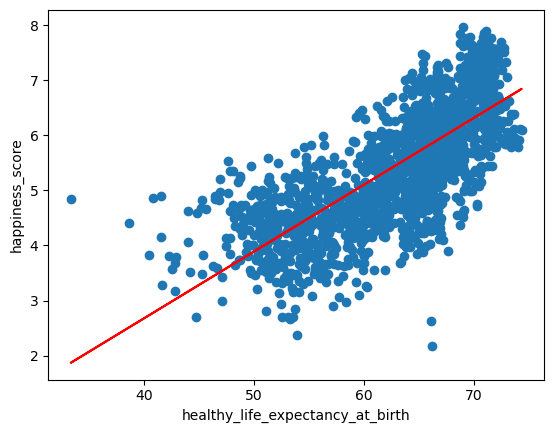

Feature: social_support
Importance:(0.18)
slope: 6.74
y-intercept: 0.0


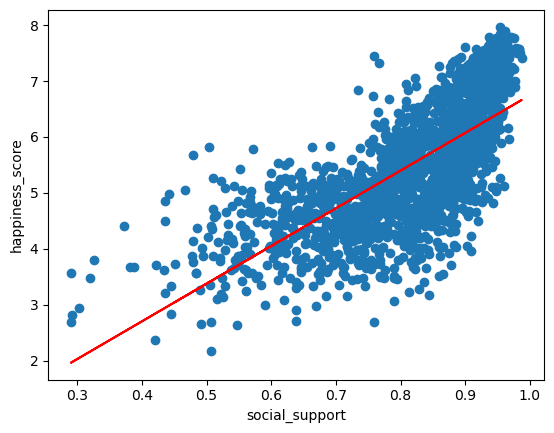

Feature: positive_affect
Importance:(0.11)
slope: 5.44
y-intercept: 1.9


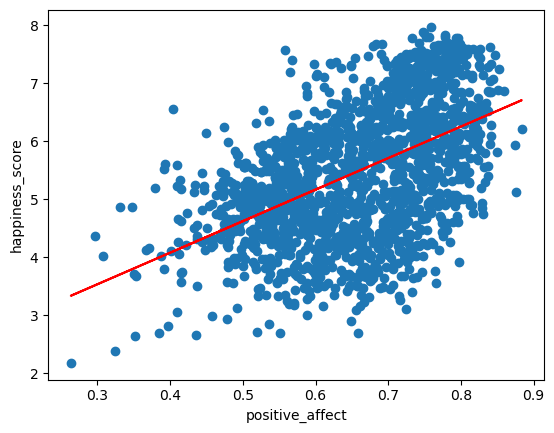

Feature: freedom_to_make_life_choices
Importance:(0.08)
slope: 4.48
y-intercept: 2.13


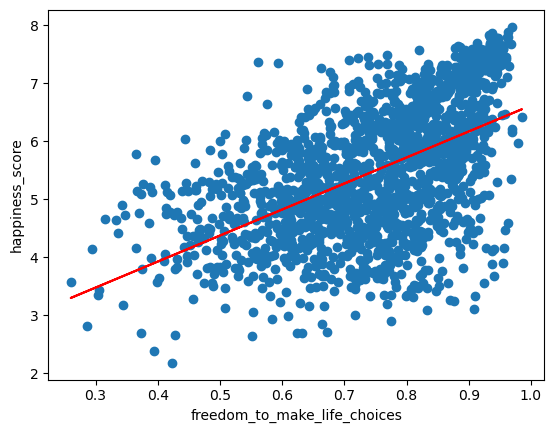

Feature: confidence_in_national_government
Importance:(0.05)
slope: -0.51
y-intercept: 5.73


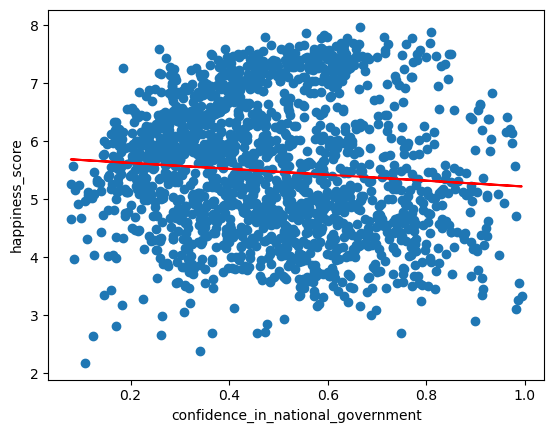

Feature: perceptions_of_corruption
Importance:(0.05)
slope: -2.96
y-intercept: 7.7


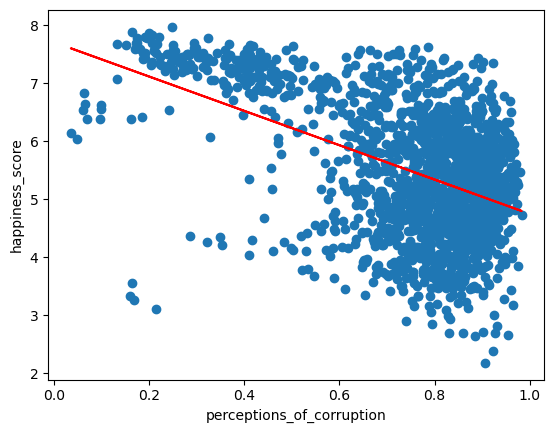

Feature: negative_affect
Importance:(0.04)
slope: -4.37
y-intercept: 6.66


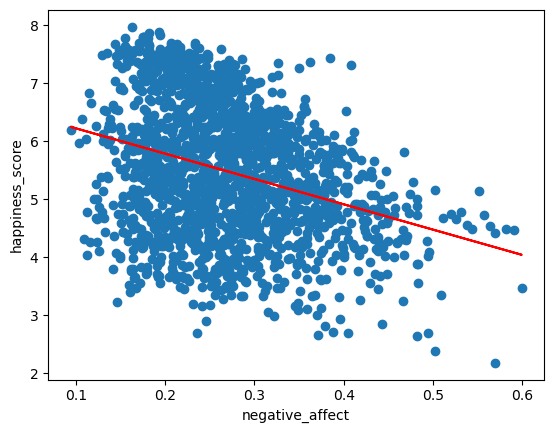

Feature: generosity
Importance:(0.04)
slope: 1.38
y-intercept: 5.48


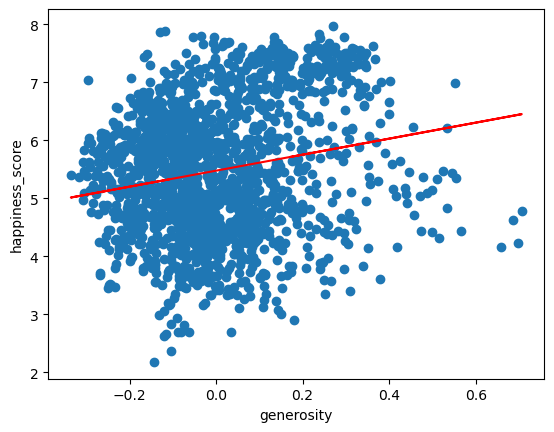

In [23]:
metrics_score(y_test, y_pred)